In [1]:
param_grid = [
    {
        'weights' : ['uniform'],
        'n_neighbors' : [ i for i in range(1,11)]
    },
    {
        'weights' : ["distance"],
        'n_neighbors': [i for i in range(1,11)],
        'p':[i for i in range(1, 6)]
    }
]

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
knn_clf = KNeighborsClassifier()

### 准备数据

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 88)

In [5]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid)

In [6]:
help(grid_search.fit)

Help on method fit in module sklearn.model_selection._search:

fit(X, y=None, groups=None, **fit_params) method of sklearn.model_selection._search.GridSearchCV instance
    Run fit with all sets of parameters.
    
    Parameters
    ----------
    
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    
    y : array-like, shape = [n_samples] or [n_samples, n_output], optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    
    **fit_params : dict of string -> object
        Parameters passed to the ``fit`` method of the estimator



In [7]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
grid_search.best_score_

0.9860821155184412

In [9]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [10]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test, y_test)

0.9861111111111112

n_jobs分配几个核来就进行处理数据，默认1核，-1代表所有核

verbose=整数  显示运行状态，数越大，越详细

In [13]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min


Wall time: 1min 25s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


> Fitting 3 folds for each of 60 candidates, totalling 180 fits

这是因为uniform类型10种，distance类型10*5种

### 更多的距离定义

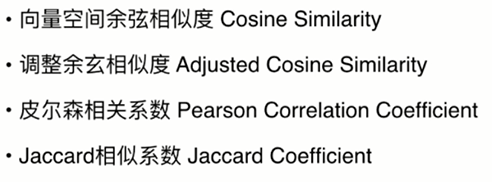